# Quick Investigation on Data

In [31]:
#Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
#Read data
data_set = pd.read_csv("data/Master_Ranked_Games.csv")
data_set.head()

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4227123625,1429,0,1,1,0,0,0,0,0,...,45,53831,41991,609,64,12.8,127,4,12916,26338
1,4219545724,1313,0,0,1,0,0,0,0,0,...,43,52924,39672,510,63,12.6,133,4,12252,29828
2,4219463634,1660,1,0,0,1,1,1,1,1,...,22,61745,46516,630,65,13.0,153,2,17005,37066
3,4205778093,984,1,1,1,0,1,0,2,0,...,5,25007,21444,304,41,8.2,51,1,10499,3085
4,4201063474,1437,0,1,1,0,1,0,2,0,...,39,71794,45798,565,68,13.6,150,7,47523,47150


In [33]:
#About data
data_set.describe()
data_set.shape
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107125 entries, 0 to 107124
Data columns (total 50 columns):
gameId                     107125 non-null int64
gameDuraton                107125 non-null int64
blueWins                   107125 non-null int64
blueFirstBlood             107125 non-null int64
blueFirstTower             107125 non-null int64
blueFirstBaron             107125 non-null int64
blueFirstDragon            107125 non-null int64
blueFirstInhibitor         107125 non-null int64
blueDragonKills            107125 non-null int64
blueBaronKills             107125 non-null int64
blueTowerKills             107125 non-null int64
blueInhibitorKills         107125 non-null int64
blueWardPlaced             107125 non-null int64
blueWardkills              107125 non-null int64
blueKills                  107125 non-null int64
blueDeath                  107125 non-null int64
blueAssist                 107125 non-null int64
blueChampionDamageDealt    107125 non-null int64
blueTot

#  Co-relation Matrix

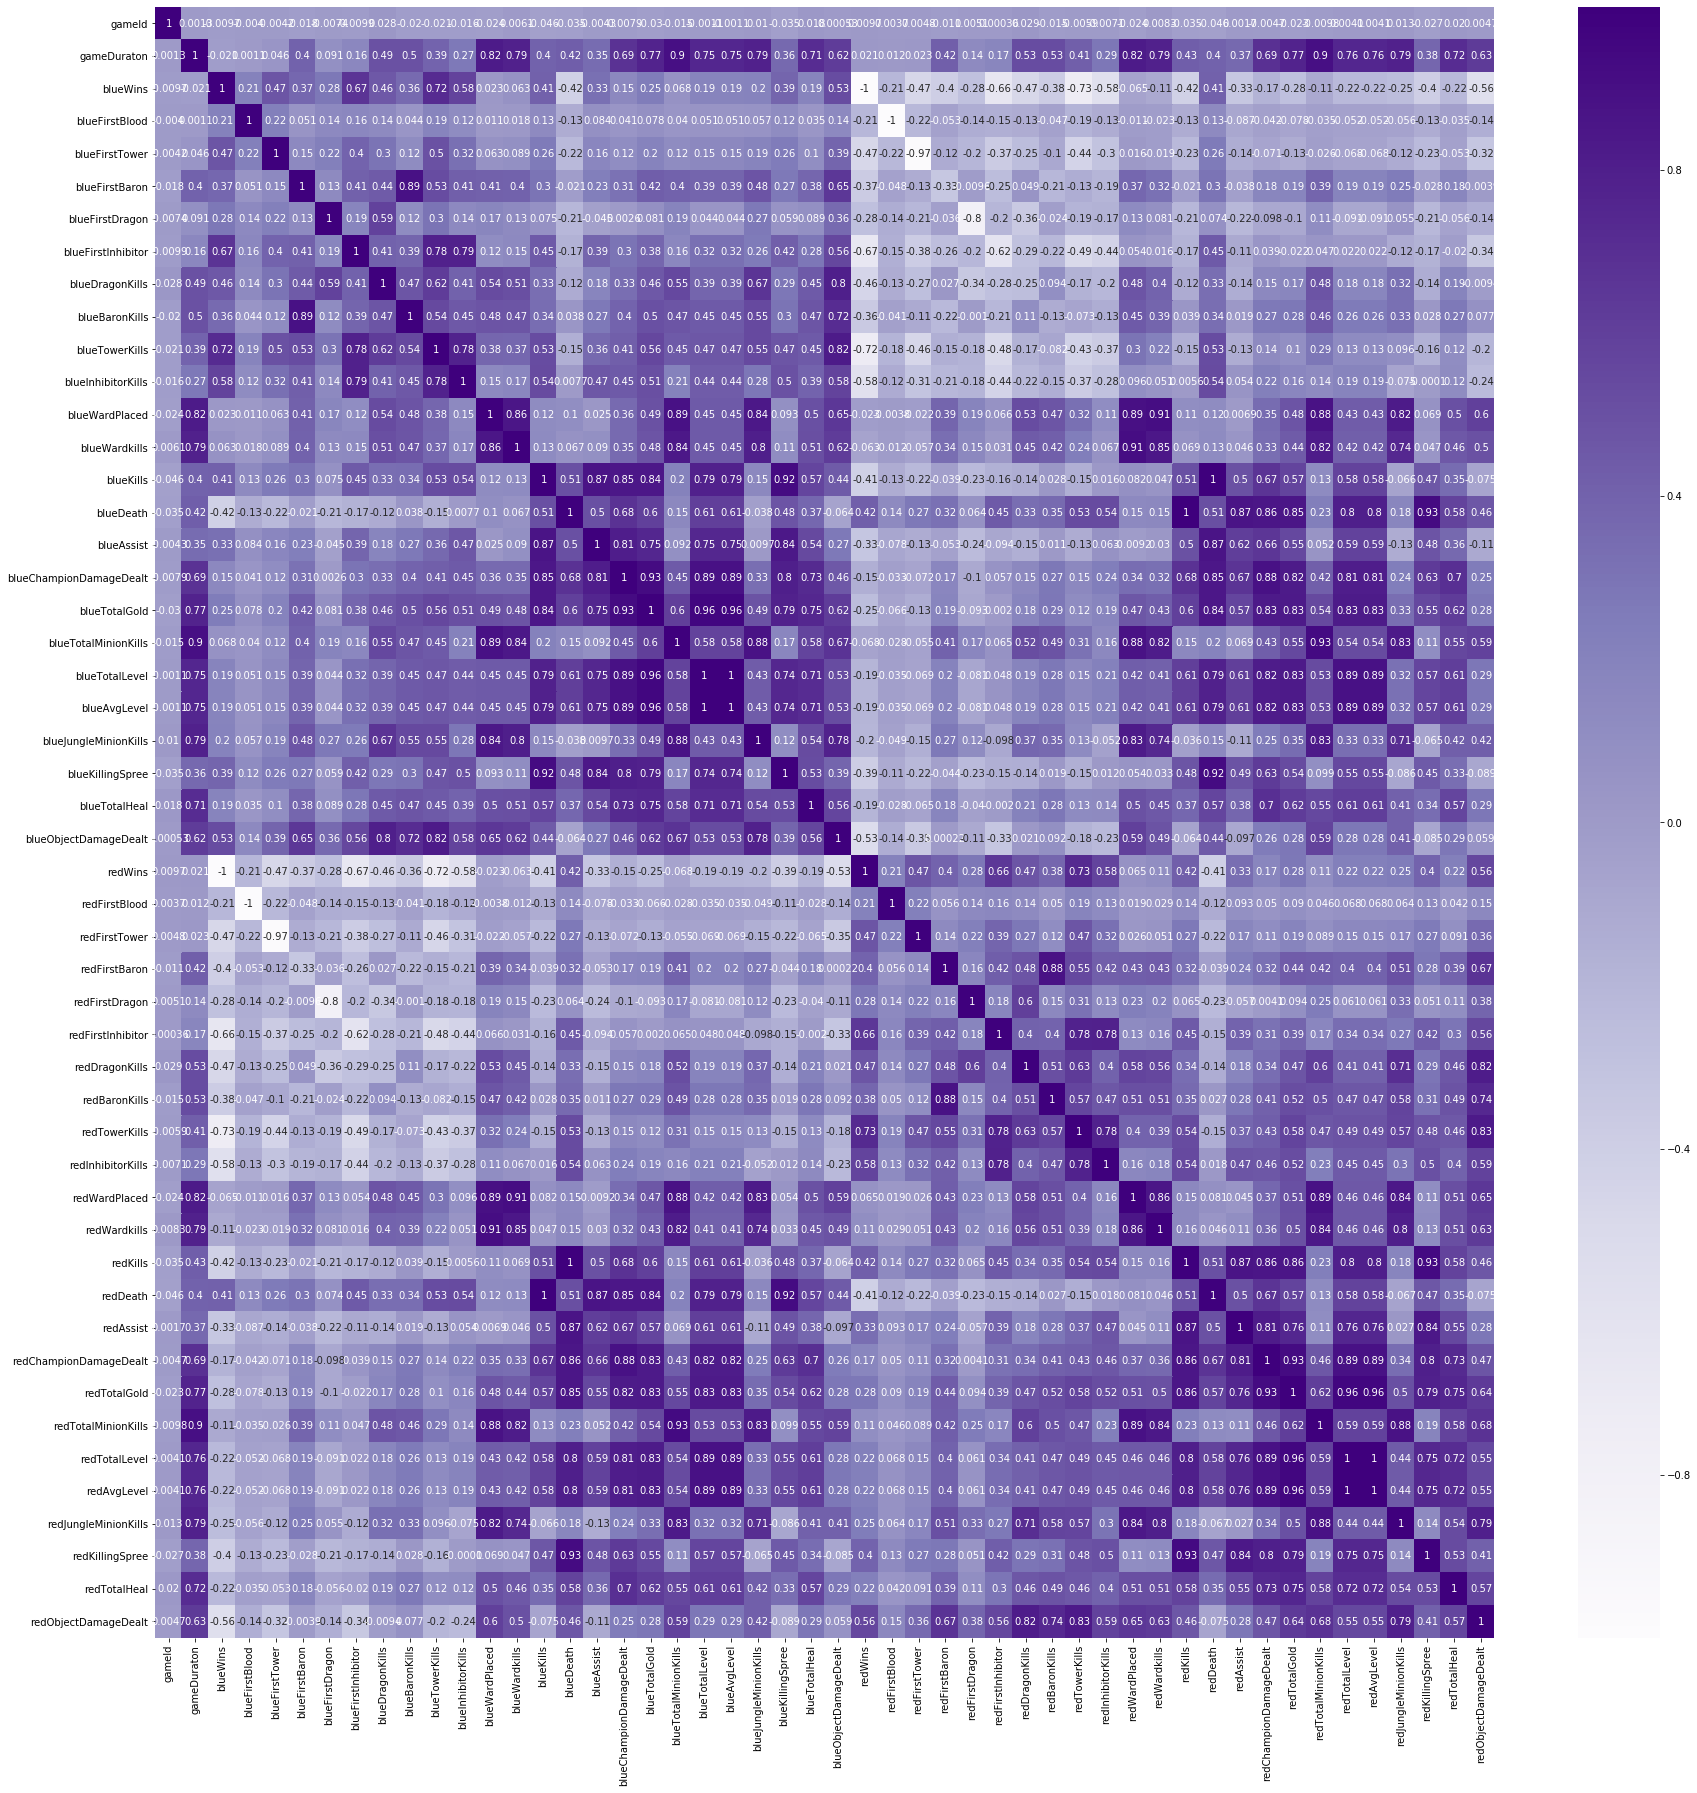

In [34]:
#Represented with heatmap:
plt.figure(figsize = (30,30))
sns.heatmap(data_set.corr(),annot = True,cmap = plt.cm.Purples)
plt.show()

In [35]:
#Irrelevant informations are GAME ID and GAME DURATION.
#Removing them with red wins because we have already blue wins. There are no tie in this game.
data_set = data_set.drop(['gameId','gameDuraton','redWins'],axis = 1)

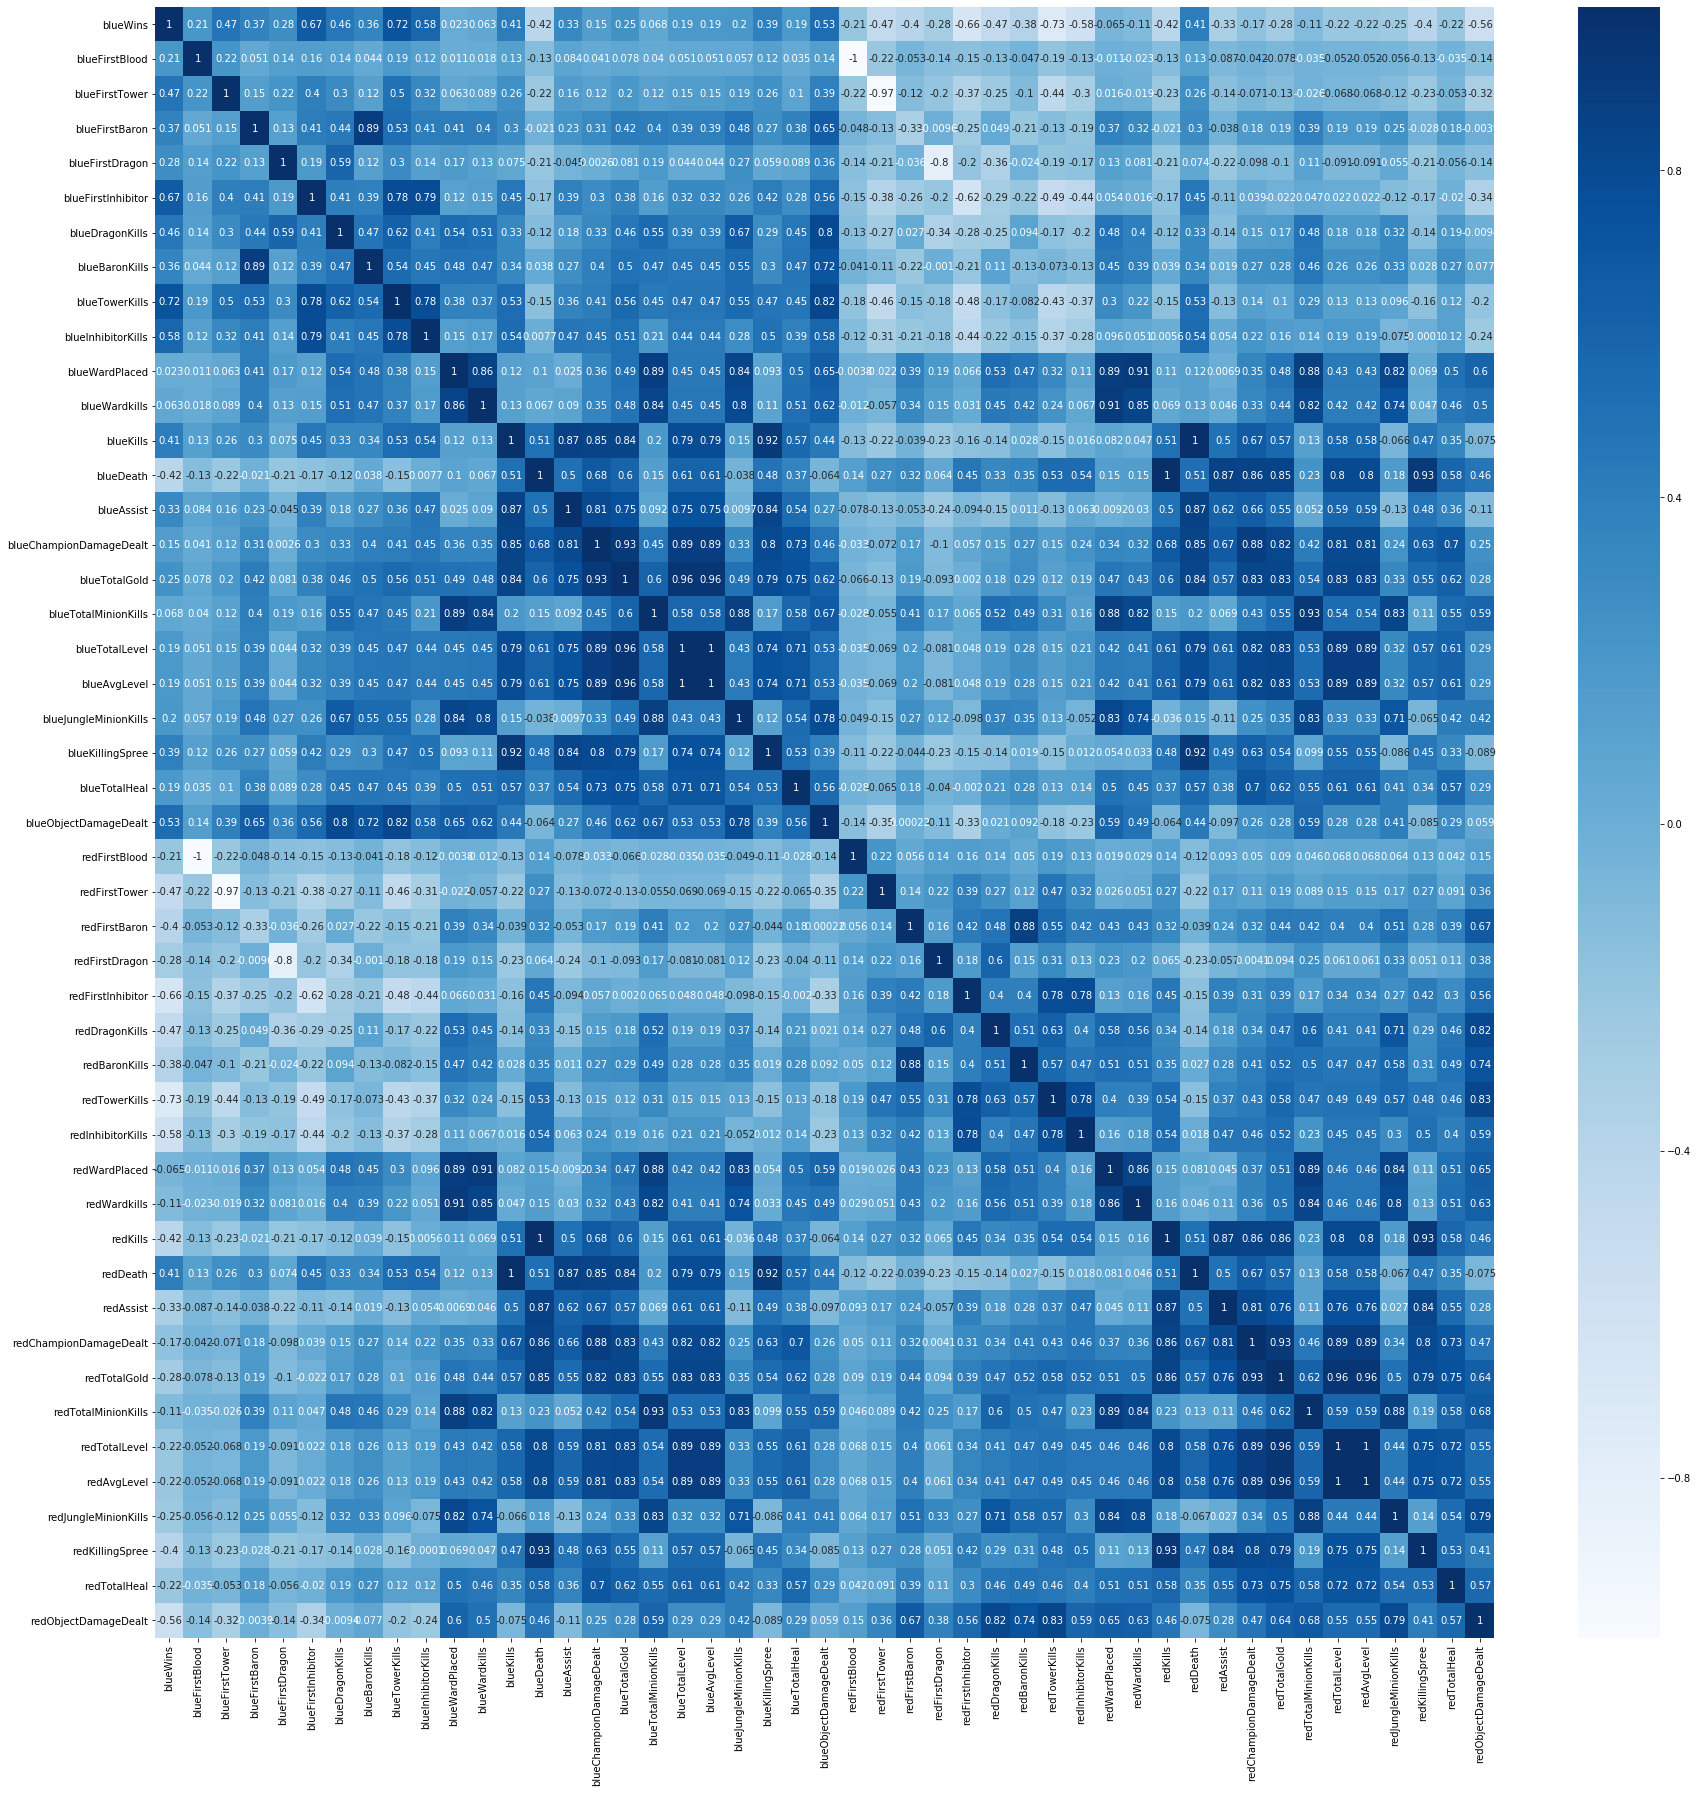

In [36]:
#Co-relation matrix revisited
plt.figure(figsize = (30,30))
sns.heatmap(data_set.corr(),annot = True,cmap = plt.cm.Blues)
plt.show()

# Exploratory Data Analysis

In [37]:
data_set

,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,0,1,1,0,0,0,0,0,4,0,...,45,53831,41991,609,64,12.8,127,4,12916,26338
1,0,0,1,0,0,0,0,0,3,0,...,43,52924,39672,510,63,12.6,133,4,12252,29828
2,1,0,0,1,1,1,1,1,9,2,...,22,61745,46516,630,65,13.0,153,2,17005,37066
3,1,1,1,0,1,0,2,0,5,0,...,5,25007,21444,304,41,8.2,51,1,10499,3085
4,0,1,1,0,1,0,2,0,3,0,...,39,71794,45798,565,68,13.6,150,7,47523,47150
5,1,0,1,0,1,0,2,0,3,0,...,12,45339,29401,402,51,10.2,92,2,24150,11133
6,1,1,1,0,1,1,4,1,9,2,...,39,60275,60427,751,75,15.0,158,6,15773,40996
7,0,0,0,0,1,0,1,0,0,0,...,13,30998,29217,427,50,10.0,89,5,12255,12166
8,1,1,1,1,0,1,2,1,9,2,...,24,59054,41460,520,61,12.2,123,4,26826,11415
9,1,1,1,0,0,1,2,0,6,1,...,10,32096,32005,447,52,10.4,93,0,10209,15732


In [38]:
#More inspections
win_stats = data_set.filter(like="blue").loc[data_set["blueWins"] == 1]
win_stats.describe()

,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,...,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt
count,53041.0,53041.000000,53041.000000,53041.000000,53041.000000,53041.000000,53041.000000,53041.000000,53041.000000,53041.000000,...,53041.000000,53041.000000,53041.000000,53041.000000,53041.000000,53041.000000,53041.000000,53041.000000,53041.000000,53041.000000
mean,1.0,0.612526,0.751739,0.394751,0.545220,0.716578,1.937388,0.489093,6.829076,1.192153,...,49.520503,74901.398446,51832.148036,507.839709,67.402236,13.480447,136.572501,7.116740,27169.639392,51134.193473
std,0.0,0.487178,0.432008,0.488802,0.497956,0.450664,1.229899,0.615136,2.646002,0.944476,...,28.634375,37463.732055,15117.998357,167.189177,14.128586,2.825717,67.294188,3.344147,15850.373107,24989.033017
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,4038.000000,11.000000,7.000000,1.400000,0.000000,0.000000,24.000000,0.000000
25%,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,5.000000,1.000000,...,30.000000,47495.000000,41531.000000,400.000000,58.000000,11.600000,97.000000,5.000000,15588.000000,32675.000000
50%,1.0,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,7.000000,1.000000,...,45.000000,70554.000000,52180.000000,520.000000,69.000000,13.800000,143.000000,7.000000,24365.000000,52024.000000
75%,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,9.000000,2.000000,...,61.000000,96515.000000,61854.000000,621.000000,77.000000,15.400000,182.000000,9.000000,35382.000000,68837.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,4.000000,11.000000,8.000000,...,256.000000,381484.000000,125158.000000,1203.000000,134.000000,26.800000,398.000000,31.000000,239168.000000,164396.000000


In [39]:
lose_stats = data_set.filter(like="blue").loc[data_set["blueWins"] == 0]
lose_stats.describe()

,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,...,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt
count,54084.0,54084.000000,54084.000000,54084.000000,54084.000000,54084.000000,54084.000000,54084.000000,54084.000000,54084.000000,...,54084.000000,54084.000000,54084.000000,54084.000000,54084.000000,54084.000000,54084.000000,54084.00000,54084.000000,54084.000000
mean,0.0,0.403557,0.279676,0.080763,0.273519,0.065195,0.792471,0.108646,1.909770,0.127635,...,30.522428,63346.580985,43770.514903,483.962004,61.635474,12.327095,110.159308,4.30264,21266.373696,23049.530989
std,0.0,0.490615,0.448844,0.272474,0.445769,0.246872,0.998498,0.352590,2.018267,0.461043,...,26.036205,37127.622884,16301.795732,183.606097,15.273979,3.054796,61.045924,3.35633,14153.656707,19960.771231
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3355.000000,0.000000,5.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,12.000000,35574.750000,32283.500000,351.000000,52.000000,10.400000,72.000000,2.00000,11137.000000,7283.000000
50%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,24.000000,57183.500000,43220.500000,501.000000,62.000000,12.400000,110.000000,4.00000,18146.000000,17869.000000
75%,0.0,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,...,41.000000,84054.000000,54610.250000,615.000000,72.000000,14.400000,150.000000,6.00000,27988.000000,33520.250000
max,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,3.000000,11.000000,7.000000,...,245.000000,360226.000000,134323.000000,1514.000000,134.000000,26.800000,392.000000,27.00000,146987.000000,162652.000000


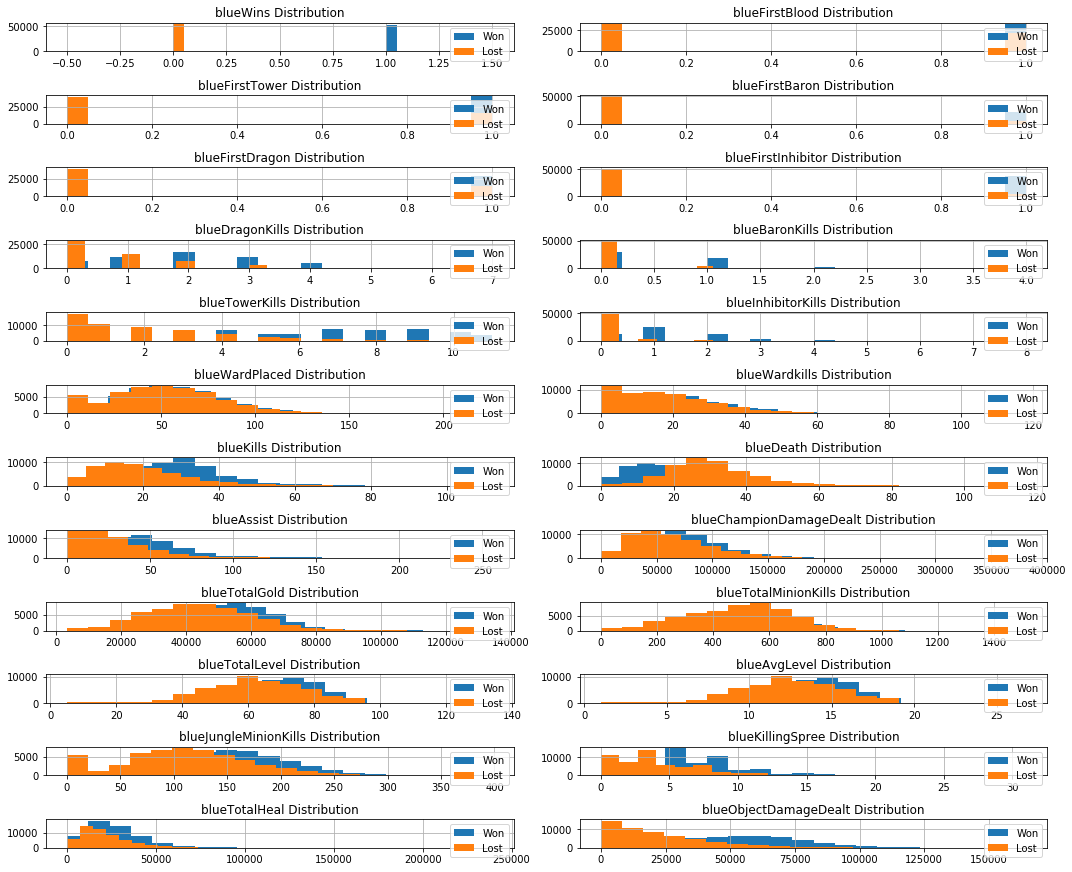

In [40]:
from matplotlib import pyplot
def compare_histograms(df1, df2, variables, n_rows, n_cols):
        fig=plt.figure(figsize=(15,15))
        for i, var_name in enumerate(variables):
            ax=fig.add_subplot(n_rows,n_cols,i+1)
            df1[var_name].hist(bins=20, ax=ax, label="Won") # for histogram
            df2[var_name].hist(bins=20, ax=ax, label="Lost") # for histogram
            ax.set_title(var_name+" Distribution")
            pyplot.legend(loc="upper right")
            plt.tight_layout()
        plt.show()



histogram_data_win = win_stats
histogram_data_lose = lose_stats
        
compare_histograms(histogram_data_win, histogram_data_lose, histogram_data_win, 15, 2)

# Data Preprocessing

In [41]:
y = data_set.iloc[:,0].values #win class
x = data_set.iloc[:,1:].values #other attributes seperated

In [42]:
#Preparing train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3,stratify=y)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [43]:
'''#Double Cross Validation in order to find optimal n_estimators and max_features that results with useful accuracy. 

from sklearn.model_selection import KFold
from sklearn import tree
import matplotlib.pyplot as plt

# manual nested cross-validation for random forest on a classification dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# enumerate splits
outer_results = list()
for train_ix, test_ix in cv_outer.split(x):
	# split data
	X_train, X_test = x[train_ix, :], x[test_ix, :]
	y_train, y_test = y[train_ix], y[test_ix]
	# configure the cross-validation procedure
	cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
	# define the model
	model = RandomForestClassifier(random_state=1)
	# define search space
	space = dict()
	space['n_estimators'] = [100, 400, 1000]
	space['max_features'] = [4, 6, 10]
	# define search
	search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
	# execute search
	result = search.fit(X_train, y_train)
	# get the best performing model fit on the whole training set
	best_model = result.best_estimator_
	# evaluate model on the hold out dataset
	yhat = best_model.predict(X_test)
	# evaluate the model
	acc = accuracy_score(y_test, yhat)
	# store the result
	outer_results.append(acc)
	# report progress
	print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))'''

"#Double Cross Validation in order to find optimal n_estimators and max_features that results with useful accuracy. \n\nfrom sklearn.model_selection import KFold\nfrom sklearn import tree\nimport matplotlib.pyplot as plt\n\n# manual nested cross-validation for random forest on a classification dataset\nfrom numpy import mean\nfrom numpy import std\nfrom sklearn.datasets import make_classification\nfrom sklearn.model_selection import KFold\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import accuracy_score\n\n# configure the cross-validation procedure\ncv_outer = KFold(n_splits=10, shuffle=True, random_state=1)\n# enumerate splits\nouter_results = list()\nfor train_ix, test_ix in cv_outer.split(x):\n\t# split data\n\tX_train, X_test = x[train_ix, :], x[test_ix, :]\n\ty_train, y_test = y[train_ix], y[test_ix]\n\t# configure the cross-validation procedure\n\tcv_inner = KFold(n_splits=3, shuffle=True, random_sta

# Modal Selection - XGboost Classifier

In [44]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

classifier = XGBClassifier(n_estimators = 100,learning_rate = 0.3)
classifier.fit(x_train,y_train, eval_set=[(x_train,y_train),(x_test,y_test)])
y_pred = classifier.predict(x_test)

[0]	validation_0-error:0.02326	validation_1-error:0.02545
[1]	validation_0-error:0.02136	validation_1-error:0.02352
[2]	validation_0-error:0.01764	validation_1-error:0.02007
[3]	validation_0-error:0.01606	validation_1-error:0.01948
[4]	validation_0-error:0.01534	validation_1-error:0.01870
[5]	validation_0-error:0.01355	validation_1-error:0.01755
[6]	validation_0-error:0.01267	validation_1-error:0.01696
[7]	validation_0-error:0.01208	validation_1-error:0.01637
[8]	validation_0-error:0.01152	validation_1-error:0.01540
[9]	validation_0-error:0.01084	validation_1-error:0.01469
[10]	validation_0-error:0.01026	validation_1-error:0.01416
[11]	validation_0-error:0.00993	validation_1-error:0.01391
[12]	validation_0-error:0.00962	validation_1-error:0.01372
[13]	validation_0-error:0.00899	validation_1-error:0.01329
[14]	validation_0-error:0.00859	validation_1-error:0.01310
[15]	validation_0-error:0.00813	validation_1-error:0.01301
[16]	validation_0-error:0.00784	validation_1-error:0.01266
[17]	va

# Metrics #1-1

In [45]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(cm,"\n accuracy:",accuracy)

[[16078   147]
 [  156 15757]] 
 accuracy: 0.9905719086439728


# Modal Selection - Decision Tree Classifier

In [46]:
from sklearn import tree
import matplotlib.pyplot as plt

clf = tree.DecisionTreeClassifier(criterion = "gini", min_samples_split=5000, max_features=4)
clf = clf.fit(x_train,y_train)
y_pred2 = clf.predict(x_test)

# Metrics #1-2

In [47]:
cm2 = confusion_matrix(y_test, y_pred2)
accuracy2 = accuracy_score(y_test, y_pred2)
print(cm2,"\n accuracy:",accuracy2)

[[14793  1432]
 [ 1155 14758]] 
 accuracy: 0.9195033916236232


# Visualization of XGB Tree and Decision Tree 1

In [48]:
#XGB Tree as .png saved
import xgboost as xgb

format = 'png' #You should try the 'svg'

image = xgb.to_graphviz(classifier)

#Set a different dpi (work only if format == 'png')
image.graph_attr = {'dpi':'400'}

image.render('original-Master-XGB-1', format = format)

'original-Master-XGB-1.png'

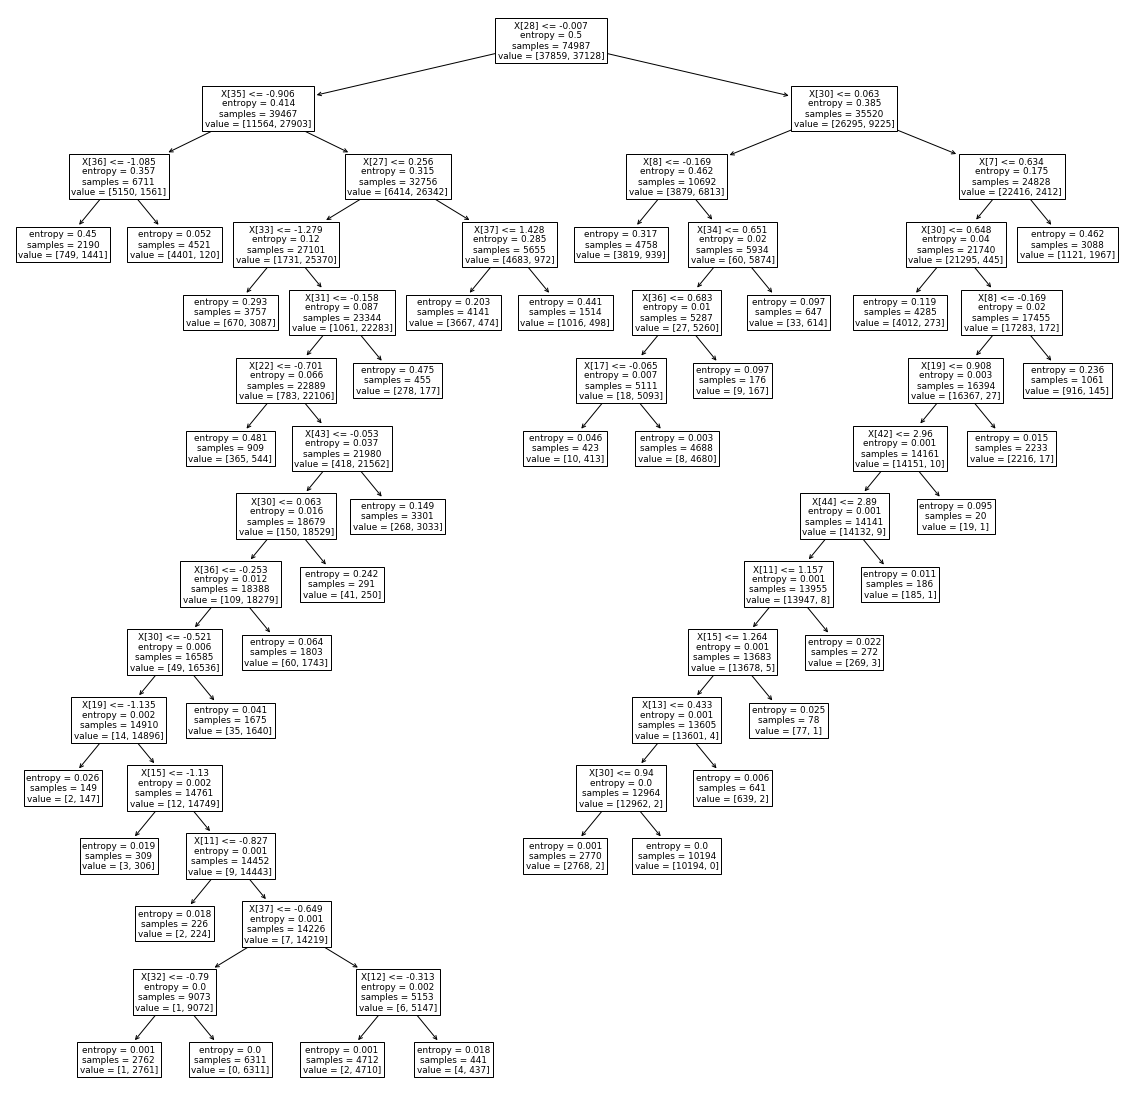

'original-Master-Decision-1.png'

In [49]:
#Decision Tree as you can see down below and saved as .png
tree_plot = plt.figure(figsize=(20,20))
tree.plot_tree(clf)
plt.show()

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import pandas as pd
import graphviz

dot_data = export_graphviz(clf, out_file=None,filled=True, rounded=True, special_characters=True ,class_names=['0','1'])
graph = graphviz.Source(dot_data)

graph.render(filename="original-Master-Decision-1", format="png")

# Dimensionality Reduction by PCA

In [50]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
reduction = pca.fit_transform(x_train)
reduction_test = pca.transform(x_test)
print(pca.explained_variance_ratio_)

[0.36709252]


In [51]:
data_reduced = pd.DataFrame(data = reduction,columns = ['pc1'])
data_reduced

,pc1
0,1.514879
1,-6.013609
2,-3.917353
3,4.433780
4,1.412750
5,4.990594
6,0.897165
7,0.622507
8,4.501674
9,1.472115


In [52]:
reduction_test

array([[ 1.88189998],
       [ 0.6891794 ],
       [ 5.39234783],
       ...,
       [ 9.80995628],
       [-0.07197658],
       [ 3.21293353]])

In [53]:
#Preparing PC1 to put in XGB again
x_reduced = data_reduced.iloc[:,:].values

# PCA XGB Tree

In [54]:
#Fitting XGB Classifier
from xgboost import XGBClassifier
reduced_class = XGBClassifier(n_estimators = 100,learning_rate = 0.1)
reduced_class.fit(x_reduced,y_train)
y_reduced_pred = reduced_class.predict(reduction_test)

# Metrics #2-1

In [55]:
from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(y_test, y_reduced_pred)
accuracy = accuracy_score(y_test, y_reduced_pred)
print(cm,"\n accuracy:",accuracy)

[[9717 6508]
 [9155 6758]] 
 accuracy: 0.5126330201008152


# PCA Decision Tree

In [56]:
#Fitting Decision Tree Classifier
clf2 = tree.DecisionTreeClassifier(criterion = "gini", min_samples_split=5000)
clf2 = clf2.fit(x_reduced,y_train)
y_reduced_pred2 = clf2.predict(reduction_test)

# Metrics #2-2

In [57]:
cm2 = confusion_matrix(y_test, y_reduced_pred2)
accuracy2 = accuracy_score(y_test, y_reduced_pred2)
print(cm2,"\n accuracy:",accuracy2)

[[10112  6113]
 [ 9623  6290]] 
 accuracy: 0.510361565747713


# Visualization of XGB Tree and Decision Tree 2

In [58]:
#XGB Tree as .png saved
import xgboost as xgb

format = 'png' #You should try the 'svg'

image = xgb.to_graphviz(reduced_class)

#Set a different dpi (work only if format == 'png')
image.graph_attr = {'dpi':'400'}

image.render('original-Master-XGB-2', format = format)

'original-Master-XGB-2.png'

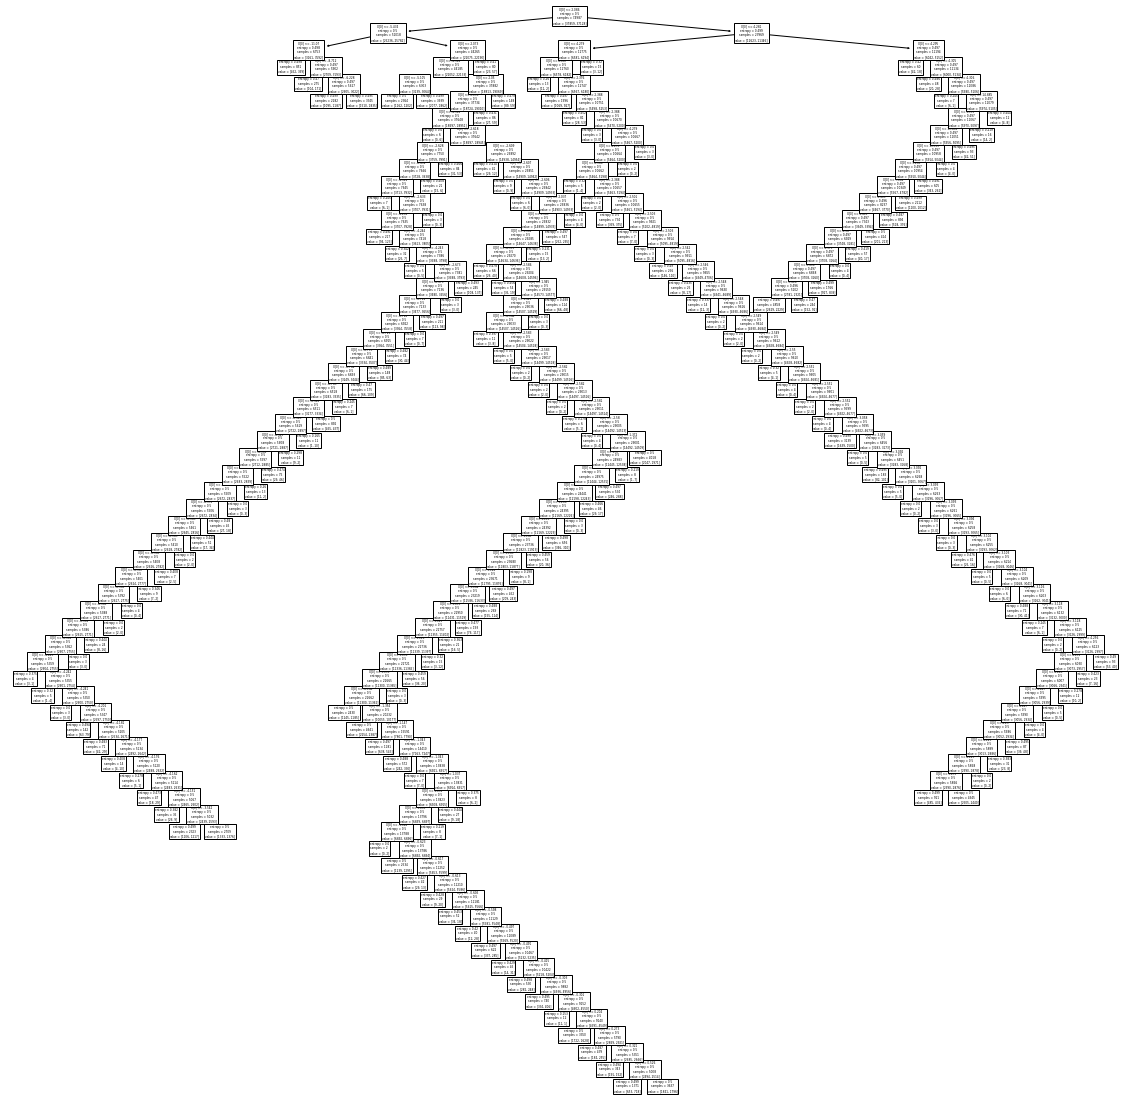

'original-Master-Decision-2.png'

In [59]:
#Decision Tree as you can see down below and saved as .png
tree_plot = plt.figure(figsize=(20,20))
tree.plot_tree(clf2)
plt.show()

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import pandas as pd
import graphviz

dot_data = export_graphviz(clf2, out_file=None,filled=True, rounded=True, special_characters=True ,class_names=['0','1'])
graph = graphviz.Source(dot_data)

graph.render(filename="original-Master-Decision-2", format="png")